In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
#this data was scrapped from IMDb
movies = pd.read_csv('./datasets/peliculas.csv')

In [4]:
movies.head(4)

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0


In [5]:
movies.shape

(5043, 19)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

# Separing numerical values

In [7]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [8]:
num_cols = [i for i in num.index if num[i]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [9]:
movies_num = movies[num_cols]
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


# Checking data

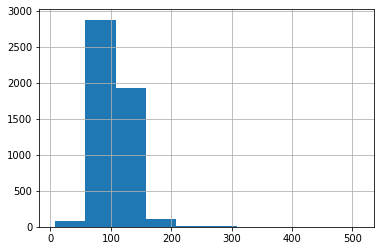

In [10]:
movies_num['duration'].hist() # this graphic shows a normal behavior, evaluating duration of movies

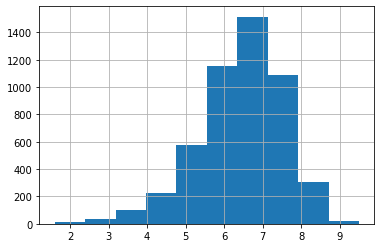

In [11]:
movies_num['imdb_score'].hist() # Evaluating IMDb score, a normal distribution can be seen

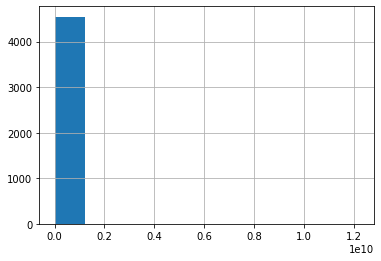

In [12]:
movies_num['budget'].hist() # this graphic shows an unnormal behavior, let's check

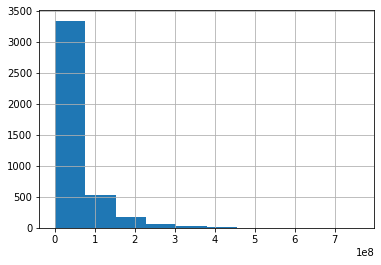

In [13]:
movies_num['gross'].hist() # this graphic is also unnormal, this is due to the currencies 

In [14]:
(movies_num['budget'] >1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [15]:
mask = movies_num['budget'] > 1e9
movies[mask]
# Something instereting can bee seen, the problem is that this movies have a budget in another currency
# let's figure it out

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [16]:
financials = pd.read_csv('./datasets/thenumbers.csv')
#this data set now has the budget in USD

In [17]:
financials = financials[['movie_title','production_budget','worldwide_gross']]
financials

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099
5,The Lone Ranger,275000000,260002115
6,John Carter,275000000,282778100
7,Tangled,260000000,586581936
8,Spider-Man 3,258000000,890875303
9,Avengers: Age of Ultron,250000000,1404705868


In [18]:
movies_num = pd.concat([movies_num,movies['movie_title']], axis=1)

In [19]:
movies_v2 = pd.merge(financials,movies_num, on= 'movie_title', how='left')

In [20]:
movies_v2.shape # now the dataset has worldwide_gross to be considered in the model

(4385, 11)

# Fixing missing Data

In [21]:
movies_v2.notnull().apply(pd.Series.value_counts) # Counting values that does not have NaN 

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [22]:
(movies_v2 !=0).apply(pd.Series.value_counts) # Counting values differento from 0

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [23]:
available = (movies_v2 != 0) & (movies_v2.notnull())
available.all(axis=1).value_counts() # counting data with de passed two conditions

True     3408
False     977
dtype: int64

In [24]:
mask= available['worldwide_gross']

In [25]:
movies_v2 = movies_v2[mask]

In [26]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts() # Applying the last conditions on worldwide_gross

True    4104
Name: worldwide_gross, dtype: int64

In [27]:
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [28]:
movies_v2 = movies_v2.drop('movie_title',axis=1).drop('duration.1',axis=1).drop('gross',axis=1)

In [29]:
movies_v2

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5
5,275000000,260002115,2013.0,2.35,150.0,45757,215000000.0,6.5
6,275000000,282778100,2012.0,2.35,132.0,1873,263700000.0,6.6
7,260000000,586581936,2010.0,1.85,100.0,2036,260000000.0,7.8
8,258000000,890875303,2007.0,2.35,156.0,46055,258000000.0,6.2
9,258000000,890875303,2007.0,2.35,156.0,46055,258000000.0,6.2


In [30]:
values = imputer.fit_transform(movies_v2)

In [31]:
X = pd.DataFrame(values)

In [32]:
X.columns = movies_v2.columns

In [33]:
X.index = movies_v2.index

In [34]:
X

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
5,275000000.0,2.600021e+08,2013.000000,2.350000,150.000000,45757.0,2.150000e+08,6.5
6,275000000.0,2.827781e+08,2012.000000,2.350000,132.000000,1873.0,2.637000e+08,6.6
7,260000000.0,5.865819e+08,2010.000000,1.850000,100.000000,2036.0,2.600000e+08,7.8
8,258000000.0,8.908753e+08,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2
9,258000000.0,8.908753e+08,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2


In [35]:
X.shape

(4104, 8)

In [36]:
X.to_csv('./intermediate_results/X.csv')